# Enernoc 100 Building

In [5]:
# from ipyleaflet import Map

# Map(center=[34.6252978589571, -77.34580993652344], zoom=10)

In [6]:
#Importing required libraries

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas as pd

import json

import os

from matplotlib.pyplot import *

import ipyleaflet as ipyl
import ipywidgets as ipyw
import json

from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)


### Importing Meta data file, which contains: INDUSTRY, SUB INDUSTRY, SQ FOOT etc. 

In [7]:

meta_df =  pd.read_csv("C:/Users/arjun/Documents/Enernoc_Project_Aj/meta/all_sites.csv")



### Importing Sampple data file from csv 10, which contains: VALUE, date and time, estimated etc.

In [8]:
sample_df = pd.read_csv("C:/Users/arjun/Documents/Enernoc_Project_Aj/Data_csv/csv/10.csv")

In [9]:
rawfilepath = "C:/Users/arjun/Documents/Enernoc_Project_Aj/Data_csv/csv/"

In [10]:
filelist = os.listdir(rawfilepath)

In [11]:
df_df= pd.read_csv("C:/Users/arjun/Documents/Enernoc_Project_Aj/Data_csv/csv/6.csv")

In [12]:
df_df.head()

timestamp             dttm_utc    value  estimated  anomaly
0  1325376600  2012-01-01 00:10:00  52.1147          0      NaN
1  1325376900  2012-01-01 00:15:00  50.9517          0      NaN
2  1325377200  2012-01-01 00:20:00  49.8164          0      NaN
3  1325377500  2012-01-01 00:25:00  49.1795          0      NaN
4  1325377800  2012-01-01 00:30:00  47.6288          0      NaN

In [13]:
sample_df.head()

timestamp             dttm_utc     value  estimated  anomaly
0  1325376600  2012-01-01 00:10:00  105.7895          0      NaN
1  1325376900  2012-01-01 00:15:00  104.7318          0      NaN
2  1325377200  2012-01-01 00:20:00  102.2920          0      NaN
3  1325377500  2012-01-01 00:25:00  102.7851          0      NaN
4  1325377800  2012-01-01 00:30:00  101.6106          0      NaN

In [14]:
meta_df.head()

SITE_ID             INDUSTRY                   SUB_INDUSTRY    SQ_FT  \
0        6  Commercial Property  Shopping Center/Shopping Mall   161532   
1        8  Commercial Property  Shopping Center/Shopping Mall   823966   
2        9  Commercial Property               Corporate Office   169420   
3       10  Commercial Property  Shopping Center/Shopping Mall  1029798   
4       12  Commercial Property              Business Services   179665   

         LAT         LNG         TIME_ZONE TZ_OFFSET  
0  34.783001 -106.895250    America/Denver    -06:00  
1  40.320247  -76.404942  America/New_York    -04:00  
2  40.946751  -74.742087  America/New_York    -04:00  
3  39.732504  -75.006861  America/New_York    -04:00  
4  39.694541  -74.899166  America/New_York    -04:00

In [15]:
meta_df.describe()

SITE_ID         SQ_FT         LAT         LNG
count  100.000000  1.000000e+02  100.000000  100.000000
mean   338.880000  2.252528e+05   38.345746  -90.367199
std    276.371119  3.448437e+05    3.535717   18.734536
min      6.000000  1.821000e+03   27.848625 -122.701918
25%     85.500000  4.266150e+04   35.348406 -113.043608
50%    278.000000  9.210550e+04   38.729362  -80.486509
75%    546.000000  2.022598e+05   40.758628  -75.206820
max    887.000000  1.807149e+06   47.820017  -71.060518

In [16]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
SITE_ID         100 non-null int64
INDUSTRY        100 non-null object
SUB_INDUSTRY    100 non-null object
SQ_FT           100 non-null int64
LAT             100 non-null float64
LNG             100 non-null float64
TIME_ZONE       100 non-null object
TZ_OFFSET       100 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 6.3+ KB


In [17]:
from IPython.display import HTML
HTML('<iframe src=http://enernoc-open.cartodb.com/tables/all_sites/embed_map?title=true&description=true&search=false&shareable=false&cartodb_logo=true&scrollwheel=true&sql=&sw_lat=25&sw_lon=-130&ne_lat=50&ne_lon=-60 width=800 height=700></iframe>')


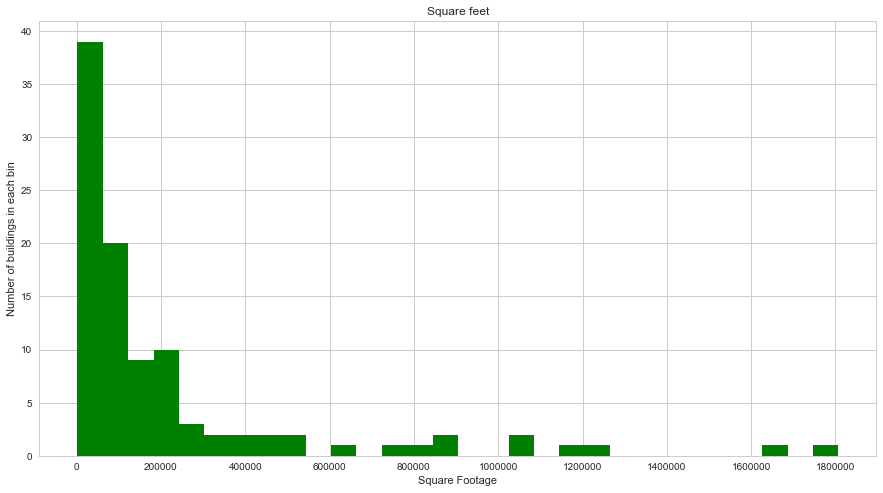

In [18]:


meta_df.hist(column='SQ_FT', figsize=(15,8), bins = 30, color='g')

plt.title('Square feet')
plt.xlabel("Square Footage")
plt.ylabel("Number of buildings in each bin")
plt.locator_params(nbins=15)

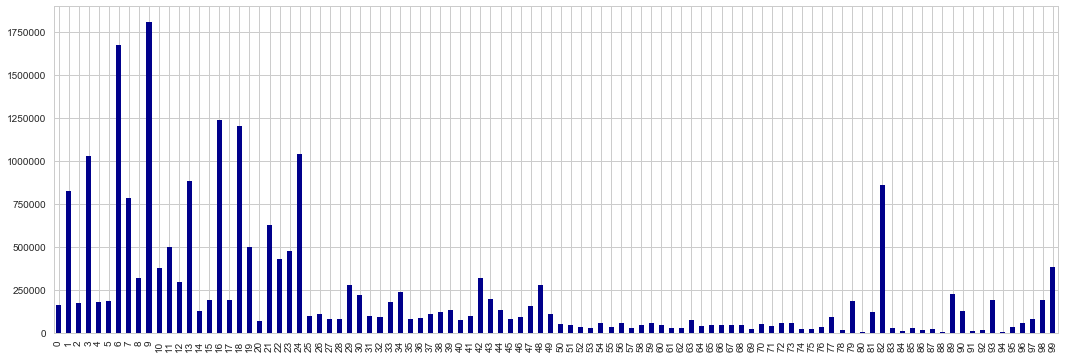

In [19]:
meta_df.SQ_FT.plot(kind='bar',figsize=(18, 6),color='darkblue')

 #### we have a majority of buildings under 200,000 sqft

In [20]:
meta_pivoted_1 = meta_df.pivot(index='SITE_ID', columns='TIME_ZONE', values='SQ_FT')

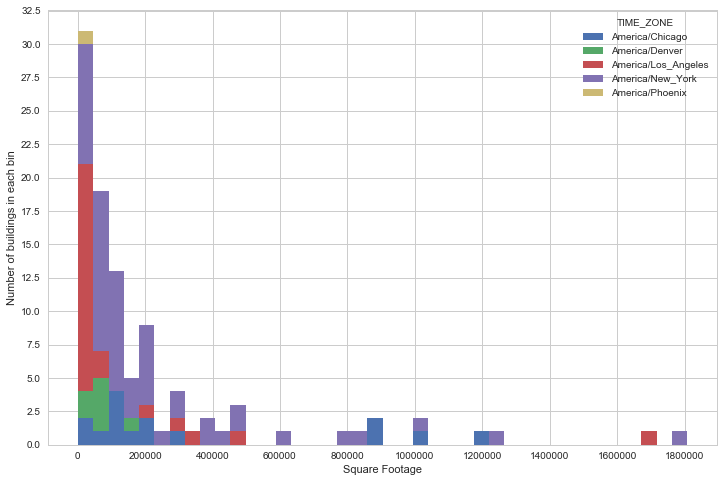

In [21]:
meta_pivoted_1.plot(kind='hist', figsize=(12,8),bins=40, stacked=True)
plt.xlabel("Square Footage")
plt.ylabel("Number of buildings in each bin")
plt.locator_params(nbins=15)

### Finding the count based on SUB INDUSTRY and plotting it 

In [22]:
meta_df['SUB_INDUSTRY'].value_counts()

Grocer/Market                    25
Primary/Secondary School         25
Food Processing                  19
Shopping Center/Shopping Mall    14
Manufacturing                     5
Commercial Real Estate            4
Business Services                 3
Bank/Financial Services           2
Corporate Office                  2
Other Light Industrial            1
Name: SUB_INDUSTRY, dtype: int64

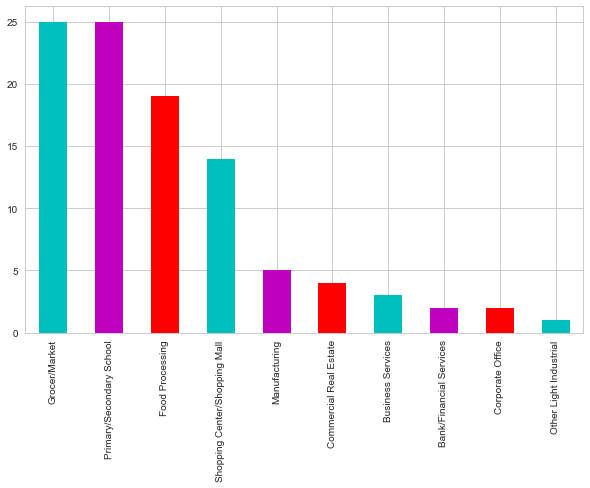

In [23]:
meta_df['SUB_INDUSTRY'].value_counts().plot(
     kind='bar', color= 'cmr', figsize=(10,6) )

In [24]:
meta_df.isnull().sum()

SITE_ID         0
INDUSTRY        0
SUB_INDUSTRY    0
SQ_FT           0
LAT             0
LNG             0
TIME_ZONE       0
TZ_OFFSET       0
dtype: int64

#### There are no NAN values in meta dataset. 

### Grouping by Industry, Sub industry with count and plotting it !

In [25]:
meta_df.groupby(['INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False)

INDUSTRY              SUB_INDUSTRY                 
Food Sales & Storage  Grocer/Market                    25
Education             Primary/Secondary School         25
Light Industrial      Food Processing                  19
Commercial Property   Shopping Center/Shopping Mall    14
Light Industrial      Manufacturing                     5
Commercial Property   Commercial Real Estate            4
                      Business Services                 3
                      Corporate Office                  2
                      Bank/Financial Services           2
Light Industrial      Other Light Industrial            1
dtype: int64

In [26]:
meta_df.groupby(['INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False).plot(
     kind='bar', color= 'cmr', figsize=(10,6) )

### Plotting scatter plot for Square footage based on Industry and Sub industry

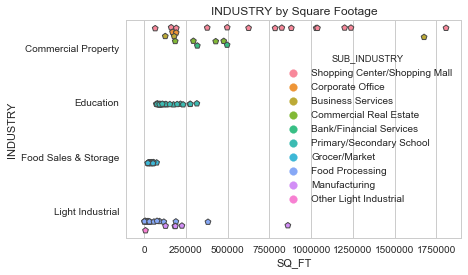

In [27]:
ax = sns.stripplot(x="SQ_FT", y="INDUSTRY",hue = "SUB_INDUSTRY",
                   data=meta_df, jitter=True ,size= 6, marker= "p" ,linewidth=1,split=True)
sns.plt.title("INDUSTRY by Square Footage",fontsize=12)

In [28]:
meta_df.groupby(['INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False).plot(
     kind='bar', color= 'cmr' )

In [29]:
# meta_df.groupby(['TIME_ZONE','INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False).plot(
#      kind='bar', color= 'cmr', figsize=(10,6) )

In [30]:
meta_df.groupby(['TIME_ZONE','INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False)

TIME_ZONE            INDUSTRY              SUB_INDUSTRY                 
America/Los_Angeles  Food Sales & Storage  Grocer/Market                    17
America/New_York     Education             Primary/Secondary School         15
                     Light Industrial      Food Processing                  11
                     Commercial Property   Shopping Center/Shopping Mall     9
                     Food Sales & Storage  Grocer/Market                     8
America/Chicago      Education             Primary/Secondary School          7
America/Los_Angeles  Light Industrial      Food Processing                   3
America/Chicago      Light Industrial      Manufacturing                     3
America/Denver       Education             Primary/Secondary School          3
America/Chicago      Commercial Property   Shopping Center/Shopping Mall     3
America/New_York     Commercial Property   Commercial Real Estate            3
                                           Business Servic

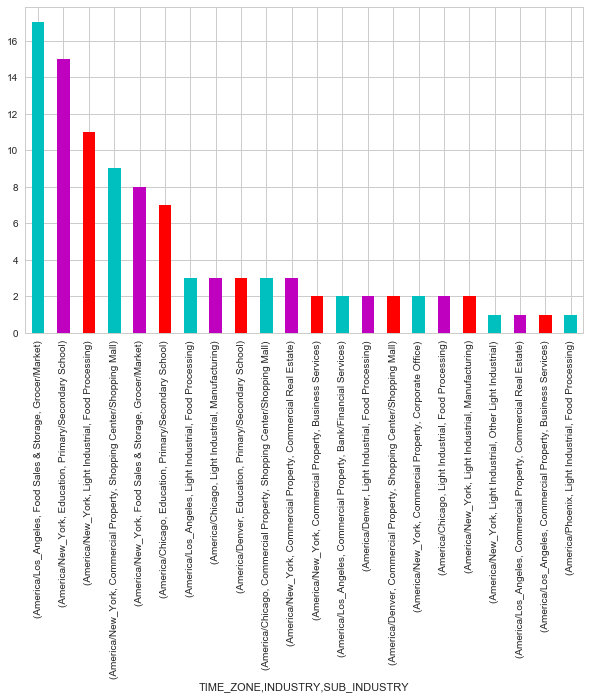

In [31]:
meta_df.groupby(['TIME_ZONE','INDUSTRY', 'SUB_INDUSTRY']).size().sort_values(ascending=False).plot(
     kind='bar', color= 'cmr', figsize=(10,6) )

### Dropping colunms: LAT','LNG','TZ_OFFSET from data set and naming the data set as meta_hdf

In [32]:
meta_hdf = meta_df.drop(['LAT','LNG','TZ_OFFSET', 'SITE_ID'], axis=1)

In [33]:

meta_hdf.sort_values(by= 'SQ_FT', ascending = False)[:10]



INDUSTRY                   SUB_INDUSTRY    SQ_FT  \
9   Commercial Property  Shopping Center/Shopping Mall  1807149   
6   Commercial Property              Business Services  1675720   
16  Commercial Property  Shopping Center/Shopping Mall  1237908   
18  Commercial Property  Shopping Center/Shopping Mall  1200131   
24  Commercial Property  Shopping Center/Shopping Mall  1037364   
3   Commercial Property  Shopping Center/Shopping Mall  1029798   
13  Commercial Property  Shopping Center/Shopping Mall   880941   
82     Light Industrial                  Manufacturing   860258   
1   Commercial Property  Shopping Center/Shopping Mall   823966   
7   Commercial Property  Shopping Center/Shopping Mall   783982   

              TIME_ZONE  
9      America/New_York  
6   America/Los_Angeles  
16     America/New_York  
18      America/Chicago  
24      America/Chicago  
3      America/New_York  
13      America/Chicago  
82      America/Chicago  
1      America/New_York  
7      America/New_York

In [34]:
# meta_pivoted_2 = meta_df.pivot( columns='SUB_INDUSTRY', values='SQ_FT')

In [35]:
# meta_pivoted_2.plot(kind='bar', figsize=(12,8))
# plt.xlabel("Square Footage")
# plt.ylabel("Number of buildings in each bin")
# plt.locator_params(nbins=15)

### Grouping by Time zone, Industry and Sub industry with MAXIMUM values of Square footage. 

In [36]:
meta_hdf.groupby(['TIME_ZONE','INDUSTRY', 'SUB_INDUSTRY']).max()

SQ_FT
TIME_ZONE           INDUSTRY             SUB_INDUSTRY                          
America/Chicago     Commercial Property  Shopping Center/Shopping Mall  1200131
                    Education            Primary/Secondary School        274418
                    Light Industrial     Food Processing                  33596
                                         Manufacturing                   860258
America/Denver      Commercial Property  Shopping Center/Shopping Mall   161532
                    Education            Primary/Secondary School         92032
                    Light Industrial     Food Processing                  31727
America/Los_Angeles Commercial Property  Bank/Financial Services         496517
                                         Business Services              1675720
                                         Commercial Real Estate          294651
                    Food Sales & Storage Grocer/Market                    52890
                    Light Industrial     Food Processing                 189836
America/New_York    Commercial Property  Business Services               179665
                                         Commercial Real Estate          476246
                                         Corporate Office                191554
                                         Shopping Center/Shopping Mall  1807149
                    Education            Primary/Secondary School        315404
                    Food Sales & Storage Grocer/Market                    74493
                    Light Industrial     Food Processing                 381939
                                         Manufacturing                   225974
                                         Other Light Industrial            7394
America/Phoenix     Light Industrial     Food Processing                   1821

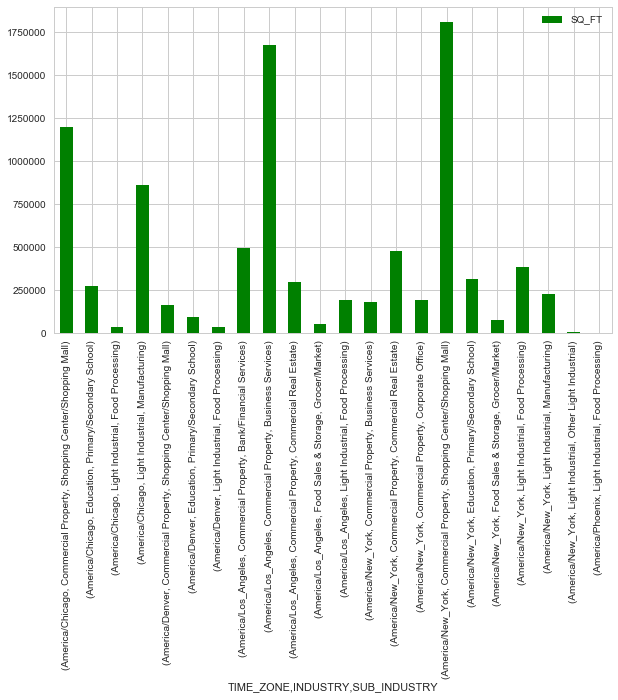

In [98]:
meta_hdf.groupby(['TIME_ZONE','INDUSTRY', 'SUB_INDUSTRY']).max().plot(kind='bar', color= 'g', figsize=(10,6))

In [38]:
meta_hdf.groupby([ 'SQ_FT']).max('TIME_ZONE')

TypeError: f() takes 1 positional argument but 2 were given

### Merging data sets in csv.

In [143]:
all_dict = {}

In [144]:
rawfilepath1 = "C:/Users/arjun/Documents/Enernoc_Project_Aj/Data_csv/csv/7.csv"

In [145]:
for filename in filelist:
#     print "Loading "+filename
    
    try:
        df = pd.read_csv(os.path.join(rawfilepath,filename), index_col="dttm_utc", parse_dates=True)
        df = df.drop(["timestamp"], axis=1).tz_localize('UTC')   
            
        #Get the SITE_ID from the filename
        SITE_ID = filename[:-4]
        all_dict[SITE_ID] = df
    except:
        
        print ("Error loading "+filename)
    
all_raw_df = pd.concat(all_dict, axis=1)

Error loading ._.DS_Store
Error loading index.html


In [155]:
all_raw_df_valuesonly = all_raw_df.xs('value', level=1, axis=1)

In [147]:
all_raw_df.sample()

10                        100            \
                              value estimated anomaly    value estimated   
dttm_utc                                                                   
2012-06-20 16:40:00+00:00  429.7574       0.0     NaN  10.2421         0   

                                       101                        103   ...    \
                          anomaly    value estimated anomaly    value   ...     
dttm_utc                                                                ...     
2012-06-20 16:40:00+00:00     NaN  42.0352         0     NaN  20.7659   ...     

                              887       9                        92            \
                          anomaly   value estimated anomaly   value estimated   
dttm_utc                                                                        
2012-06-20 16:40:00+00:00     NaN  61.576         0     NaN  4.7489         0   

                                        99                    
                          anomaly    value estimated anomaly  
dttm_utc                                                      
2012-06-20 16:40:00+00:00     NaN  11.5825         0     NaN  

[1 rows x 300 columns]

In [151]:
all_raw_df_valuesonly.sample(3)

10      100      101      103      109  \
dttm_utc                                                                  
2012-07-17 01:40:00+00:00  395.5022   2.3636  25.4666  11.8662  10.3892   
2012-02-08 05:30:00+00:00  330.9370   4.2019  26.6939  11.8662   6.1809   
2012-03-13 16:15:00+00:00  360.0595  16.5449  58.9107  35.5987  21.9619   

                              111      116       12       13      136   ...    \
dttm_utc                                                                ...     
2012-07-17 01:40:00+00:00  6.3880  16.2554  36.0071  36.4769   3.2715   ...     
2012-02-08 05:30:00+00:00  9.2178  12.7721  27.0053  27.3577   3.1867   ...     
2012-03-13 16:15:00+00:00  9.8723  33.6720  64.0126  64.8478  11.3701   ...     

                                786         8      805      808       832  \
dttm_utc                                                                    
2012-07-17 01:40:00+00:00  237.9666  167.6141  10.7755   2.4723  145.1105   
2012-02-08 05:30:00+00:00  245.6430  181.5819  10.9053   4.3952  157.2031   
2012-03-13 16:15:00+00:00  253.3193  167.6141  11.8141  17.3060  145.1105   

                                88       887        9      92      99  
dttm_utc                                                               
2012-07-17 01:40:00+00:00   6.5245   66.6802  20.2655  3.1659  2.8956  
2012-02-08 05:30:00+00:00   9.4149   53.2805  20.6552  2.1106  2.3691  
2012-03-13 16:15:00+00:00  10.0834  160.9874  49.4946  3.1659  2.1059  

[3 rows x 100 columns]

In [46]:
all_raw_df_valuesonly['10'].nlargest(1)

dttm_utc
2012-07-26 18:50:00+00:00    527.3773
Freq: 5T, Name: 10, dtype: float64

In [47]:
all_raw_df_valuesonly.values.max(axis=1)

array([      nan,       nan,       nan, ...,  331.2987,  313.606 ,
        316.2396])

In [48]:
all_raw_df['100'].sort_values(by ='value', ascending=False).head(5)

value  estimated  anomaly
dttm_utc                                              
2012-09-04 14:55:00+00:00  39.3927          0      NaN
2012-09-05 17:05:00+00:00  38.6049          0      NaN
2012-09-04 14:50:00+00:00  37.2918          0      NaN
2012-08-27 16:45:00+00:00  37.0292          0      NaN
2012-09-18 15:50:00+00:00  37.0292          0      NaN

In [49]:
all_raw_df.max(axis=0)

10   value        527.3773
     estimated      1.0000
     anomaly           NaN
100  value         39.3927
     estimated      1.0000
     anomaly        4.0000
101  value        108.0029
     estimated      1.0000
     anomaly           NaN
103  value         78.3172
     estimated      1.0000
     anomaly           NaN
109  value         36.1648
     estimated      1.0000
     anomaly           NaN
111  value         24.3904
     estimated      1.0000
     anomaly           NaN
116  value         52.2496
     estimated      1.0000
     anomaly           NaN
12   value         78.0153
     estimated      1.0000
     anomaly           NaN
13   value         79.0333
     estimated      1.0000
     anomaly           NaN
136  value         42.4730
     estimated      1.0000
     anomaly           NaN
                    ...   
786  value        276.3484
     estimated      1.0000
     anomaly           NaN
8    value        244.4372
     estimated      1.0000
     anomaly           NaN
8

### Aggregate the data to hourly and daily
It can be noticed that the resultant dataset uses 86MB of memory -- that takes a while to plot so let's see the whole dataset in an aggregated daily frequency.

Let's use .resample() to average across each hour to create an effective average kWh value and then sum those values across 24 hours to get

In [127]:
all_raw_df_valuesonly_hourly = all_raw_df_valuesonly.truncate(after='2012-1-31').resample('H')
all_raw_df_valuesonly_daily = all_raw_df_valuesonly_hourly.resample('D', how='sum')

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app
C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app


In [128]:
all_raw_df_valuesonly_hourly


C:\Users\arjun\Anaconda3\lib\site-packages\IPython\utils\dir2.py:65: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  canary = getattr(obj, '_ipython_canary_method_should_not_exist_', None)
C:\Users\arjun\Anaconda3\lib\site-packages\IPython\utils\dir2.py:74: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  m = getattr(obj, name, None)


DatetimeIndexResampler [freq=<Hour>, axis=0, closed=left, label=left, convention=start, base=0]

### Let's plot all the daily and hourly using subplots

In [101]:
all_raw_df_valuesonly_daily.plot(subplots=True, figsize=(15,200))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000256B7215390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000025693EAE160>], dtype=object)

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025703B0B2B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000257072C76D8>], dtype=object)

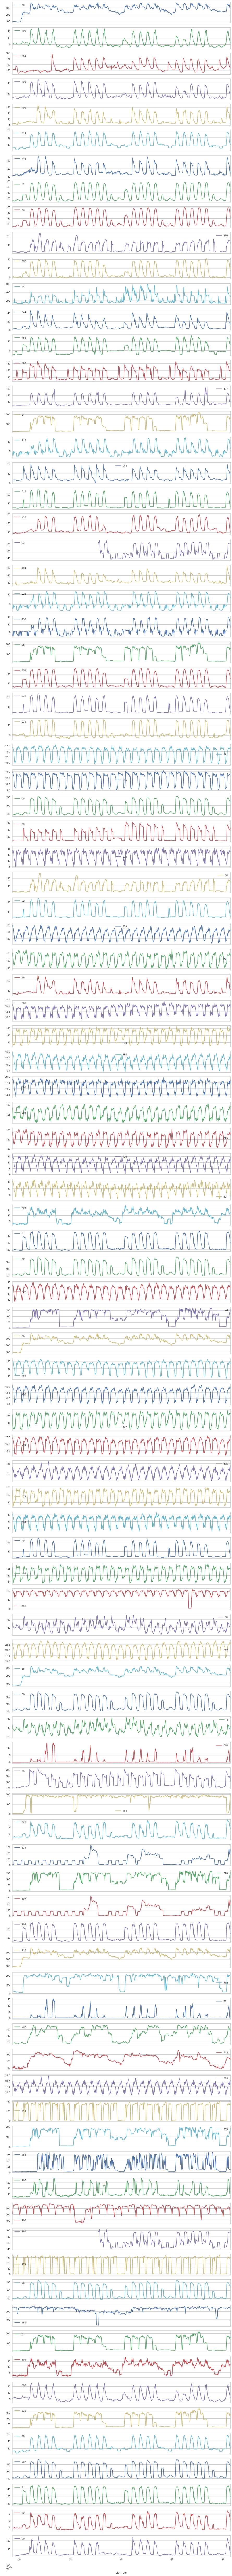

In [114]:
all_raw_df_valuesonly_hourly.plot(subplots=True, figsize=(15,200))

### Let's aggregate to annual data and plot

In [55]:
all_raw_df_valuesonly_annual = all_raw_df_valuesonly_hourly.resample('A', how='sum')

C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':
C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


C:\Users\arjun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


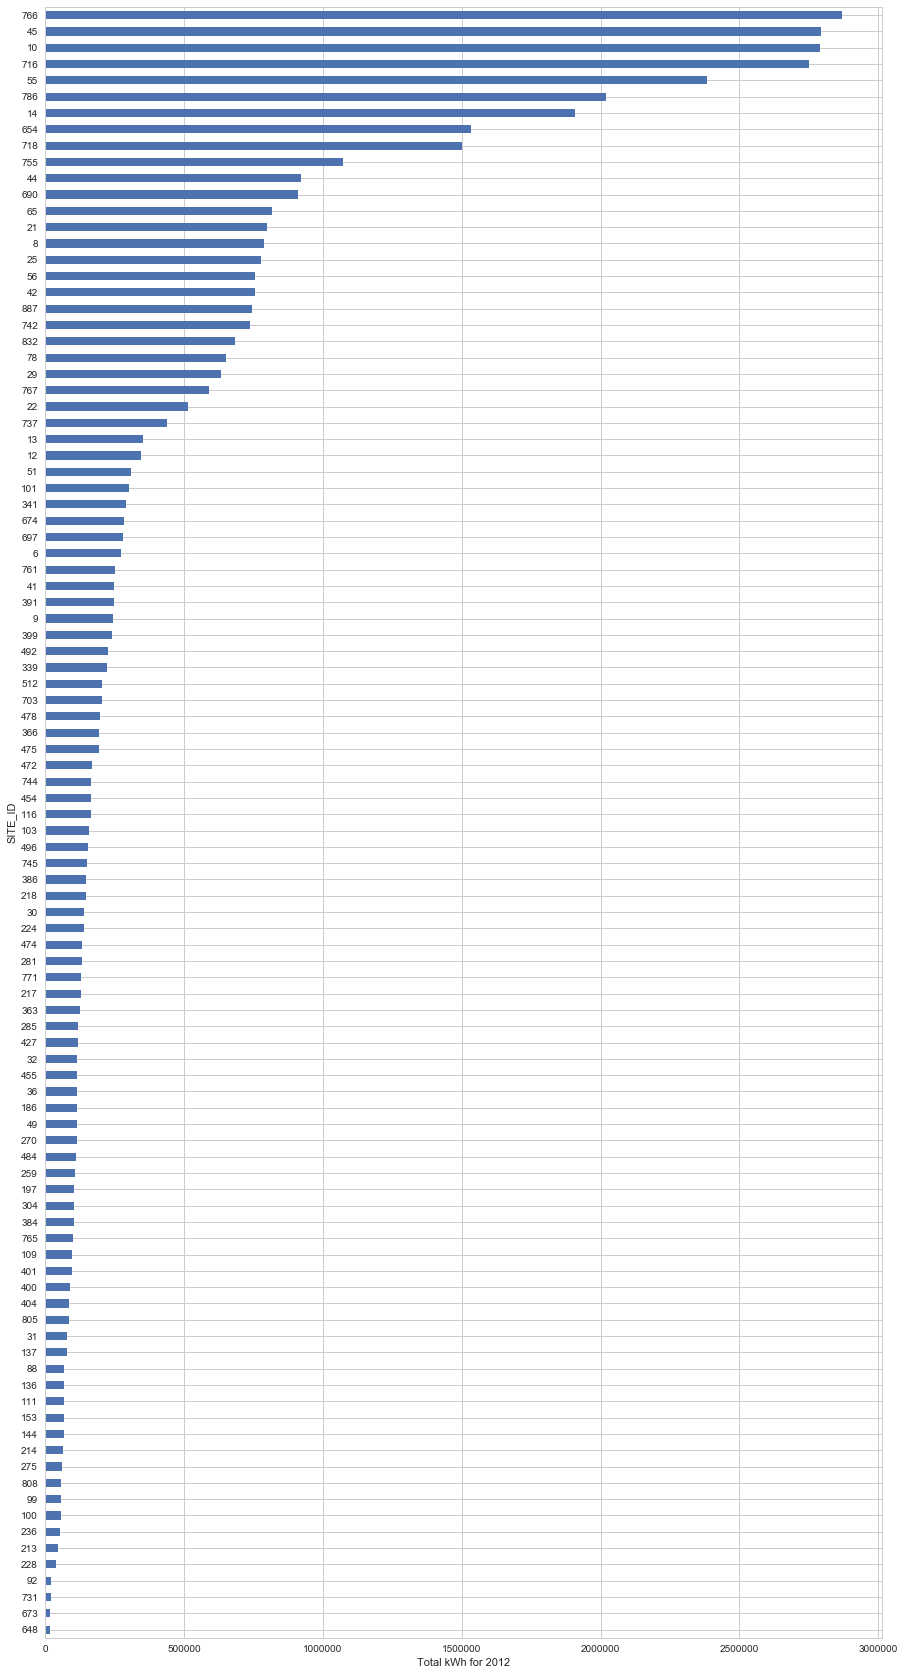

In [56]:
all_raw_df_valuesonly_annual.T.sort("2012-12-31 00:00:00+00:00").plot(kind='barh', figsize=(15,30), legend=False)
plt.xlabel("Total kWh for 2012")
plt.ylabel("SITE_ID")

### merging meta data with all the energy datasets. 

In [57]:
annualdata = all_raw_df_valuesonly_annual.T 
annualdata.columns = ["TotalkWh"]

In [58]:
annualdata = annualdata.reset_index()

In [59]:
annualdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
index       100 non-null object
TotalkWh    100 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


### The problem is that we need to merge the annualdata.index with the meta_df.SITE_ID 
but one is a float and the other is a string. We must convert them to the same type to merge.

In [60]:
meta_df['SITE_ID'] = meta_df['SITE_ID'].apply(str)

In [61]:
meta_annualdata = pd.merge(meta_df, annualdata, left_on="SITE_ID", right_on="index")

In [62]:
meta_annualdata.drop(['LAT','LNG'],axis=1)

SITE_ID              INDUSTRY                   SUB_INDUSTRY    SQ_FT  \
0        6   Commercial Property  Shopping Center/Shopping Mall   161532   
1        8   Commercial Property  Shopping Center/Shopping Mall   823966   
2        9   Commercial Property               Corporate Office   169420   
3       10   Commercial Property  Shopping Center/Shopping Mall  1029798   
4       12   Commercial Property              Business Services   179665   
5       13   Commercial Property         Commercial Real Estate   185847   
6       14   Commercial Property              Business Services  1675720   
7       21   Commercial Property  Shopping Center/Shopping Mall   783982   
8       22   Commercial Property        Bank/Financial Services   318130   
9       25   Commercial Property  Shopping Center/Shopping Mall  1807149   
10      29   Commercial Property  Shopping Center/Shopping Mall   377537   
11      30   Commercial Property        Bank/Financial Services   496517   
12      31   Commercial Property         Commercial Real Estate   294651   
13      32   Commercial Property  Shopping Center/Shopping Mall   880941   
14      36   Commercial Property              Business Services   126205   
15      41   Commercial Property               Corporate Office   191554   
16      42   Commercial Property  Shopping Center/Shopping Mall  1237908   
17      44   Commercial Property  Shopping Center/Shopping Mall   192167   
18      45   Commercial Property  Shopping Center/Shopping Mall  1200131   
19      49   Commercial Property  Shopping Center/Shopping Mall   497092   
20      51   Commercial Property  Shopping Center/Shopping Mall    65961   
21      55   Commercial Property  Shopping Center/Shopping Mall   625142   
22      56   Commercial Property         Commercial Real Estate   428277   
23      65   Commercial Property         Commercial Real Estate   476246   
24      78   Commercial Property  Shopping Center/Shopping Mall  1037364   
25      88             Education       Primary/Secondary School    94150   
26      92             Education       Primary/Secondary School   105530   
27      99             Education       Primary/Secondary School    79503   
28     100             Education       Primary/Secondary School    81681   
29     101             Education       Primary/Secondary School   274418   
..     ...                   ...                            ...      ...   
70     478  Food Sales & Storage                  Grocer/Market    47257   
71     484  Food Sales & Storage                  Grocer/Market    40590   
72     492  Food Sales & Storage                  Grocer/Market    54469   
73     496  Food Sales & Storage                  Grocer/Market    52890   
74     512  Food Sales & Storage                  Grocer/Market    21980   
75     648      Light Industrial                Food Processing    20691   
76     654      Light Industrial                Food Processing    33596   
77     673      Light Industrial                Food Processing    91304   
78     674      Light Industrial                Food Processing    12884   
79     690      Light Industrial                  Manufacturing   183631   
80     697      Light Industrial                Food Processing     4650   
81     703      Light Industrial                Food Processing   117651   
82     716      Light Industrial                  Manufacturing   860258   
83     718      Light Industrial                Food Processing    28138   
84     731      Light Industrial                Food Processing     6236   
85     737      Light Industrial                Food Processing    23843   
86     742      Light Industrial                Food Processing    17717   
87     744      Light Industrial                Food Processing    22383   
88     745      Light Industrial                Food Processing     1943   
89     755      Light Industrial                  Manufacturing   225974   
90     761      Light Industrial                  M

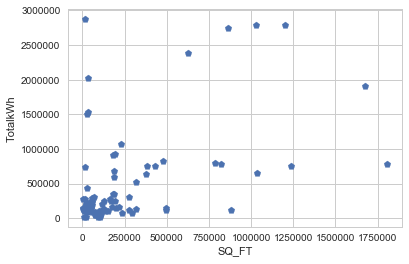

In [63]:
meta_annualdata.plot(kind='scatter', x="SQ_FT", y="TotalkWh", s=50, marker='p')

In [64]:
meta_annualdata.groupby(['TotalkWh','INDUSTRY','SUB_INDUSTRY','SQ_FT']).size().sort_values(ascending=False).head(10)

TotalkWh      INDUSTRY              SUB_INDUSTRY                   SQ_FT 
2.869800e+06  Light Industrial      Food Processing                12261     1
1.176066e+05  Food Sales & Storage  Grocer/Market                  36760     1
1.040424e+05  Food Sales & Storage  Grocer/Market                  31022     1
1.040486e+05  Education             Primary/Secondary School       132737    1
1.089566e+05  Education             Primary/Secondary School       153699    1
1.110162e+05  Food Sales & Storage  Grocer/Market                  40590     1
1.131756e+05  Education             Primary/Secondary School       276443    1
1.147609e+05  Commercial Property   Shopping Center/Shopping Mall  497092    1
1.148337e+05  Education             Primary/Secondary School       117074    1
1.153086e+05  Commercial Property   Business Services              126205    1
dtype: int64

In [65]:
meta_annualdata.groupby(['INDUSTRY','SUB_INDUSTRY']).size().sort_values(ascending=False).head(10)

INDUSTRY              SUB_INDUSTRY                 
Food Sales & Storage  Grocer/Market                    25
Education             Primary/Secondary School         25
Light Industrial      Food Processing                  19
Commercial Property   Shopping Center/Shopping Mall    14
Light Industrial      Manufacturing                     5
Commercial Property   Commercial Real Estate            4
                      Business Services                 3
                      Corporate Office                  2
                      Bank/Financial Services           2
Light Industrial      Other Light Industrial            1
dtype: int64

In [66]:
Top_10 = meta_annualdata.groupby(['TotalkWh','INDUSTRY','SUB_INDUSTRY','SQ_FT']).size().sort_values(ascending=False).head(10)

In [67]:
Top_10

TotalkWh      INDUSTRY              SUB_INDUSTRY                   SQ_FT 
2.869800e+06  Light Industrial      Food Processing                12261     1
1.176066e+05  Food Sales & Storage  Grocer/Market                  36760     1
1.040424e+05  Food Sales & Storage  Grocer/Market                  31022     1
1.040486e+05  Education             Primary/Secondary School       132737    1
1.089566e+05  Education             Primary/Secondary School       153699    1
1.110162e+05  Food Sales & Storage  Grocer/Market                  40590     1
1.131756e+05  Education             Primary/Secondary School       276443    1
1.147609e+05  Commercial Property   Shopping Center/Shopping Mall  497092    1
1.148337e+05  Education             Primary/Secondary School       117074    1
1.153086e+05  Commercial Property   Business Services              126205    1
dtype: int64

In [79]:
Top_10= meta_annualdata.groupby(['SQ_FT','TotalkWh','INDUSTRY','SUB_INDUSTRY','SITE_ID']).size().sort_values(ascending=False).head(10)

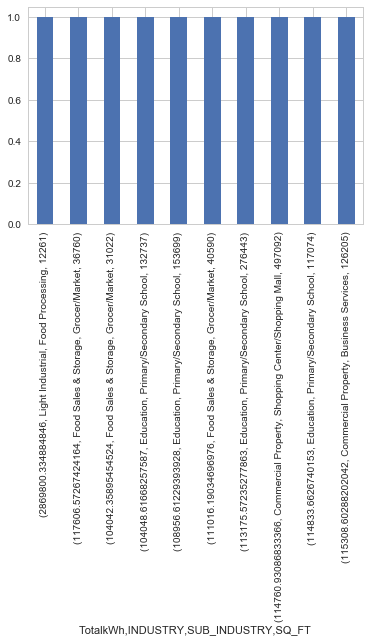

In [69]:
Top_10.plot(kind='bar', stacked=True)

In [75]:
top_10_Kwh = meta_annualdata.groupby(['TotalkWh','SQ_FT']).size().sort_values(ascending=False).head(10)

In [76]:
top_10_Kwh

TotalkWh      SQ_FT 
2.869800e+06  12261     1
1.176066e+05  36760     1
1.040424e+05  31022     1
1.040486e+05  132737    1
1.089566e+05  153699    1
1.110162e+05  40590     1
1.131756e+05  276443    1
1.147609e+05  497092    1
1.148337e+05  117074    1
1.153086e+05  126205    1
dtype: int64

In [71]:
ax = sns.barplot(x='TotalkWh', y='SQ_FT', data= Top_10)

ValueError: Could not interpret input 'TotalkWh'

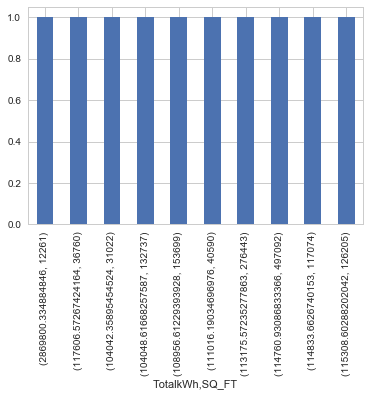

In [72]:
top_10.plot(kind='bar', stacked=True)

In [74]:
top_10


TotalkWh      SQ_FT 
2.869800e+06  12261     1
1.176066e+05  36760     1
1.040424e+05  31022     1
1.040486e+05  132737    1
1.089566e+05  153699    1
1.110162e+05  40590     1
1.131756e+05  276443    1
1.147609e+05  497092    1
1.148337e+05  117074    1
1.153086e+05  126205    1
dtype: int64

In [78]:
Top_10_SQFT

SQ_FT    TotalkWh       INDUSTRY              SUB_INDUSTRY                   SITE_ID
1807149  777103.531058  Commercial Property   Shopping Center/Shopping Mall  25         1
54589    289572.216845  Food Sales & Storage  Grocer/Market                  341        1
43690    148414.978277  Food Sales & Storage  Grocer/Market                  386        1
44594    132600.701898  Food Sales & Storage  Grocer/Market                  474        1
45105    239259.296512  Food Sales & Storage  Grocer/Market                  399        1
46503    167409.254490  Food Sales & Storage  Grocer/Market                  472        1
46697    165469.608639  Food Sales & Storage  Grocer/Market                  454        1
47257    198764.705970  Food Sales & Storage  Grocer/Market                  478        1
48878    131737.688658  Food Sales & Storage  Grocer/Market                  281        1
52890    154898.845714  Food Sales & Storage  Grocer/Market                  496        1
dtype: int64

In [86]:
tt= meta_df.groupby(['SQ_FT']).size().sort_values(ascending=False).max()

In [173]:
# meta_df.sort('SQ_FT', ascending=False).head(5)

In [172]:
# meta_df.nlargest(5, 'SQ_FT')

In [183]:
Top_10_SQFT = meta_annualdata.nlargest(10, 'SQ_FT').drop(['SITE_ID','index','LAT','LNG','TZ_OFFSET','INDUSTRY','SUB_INDUSTRY'],axis=1)

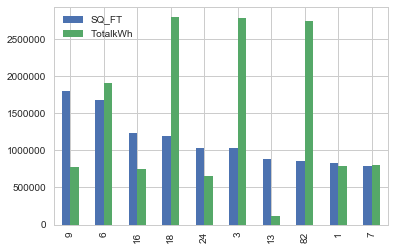

In [186]:
Top_10_SQFT.plot(kind='bar')

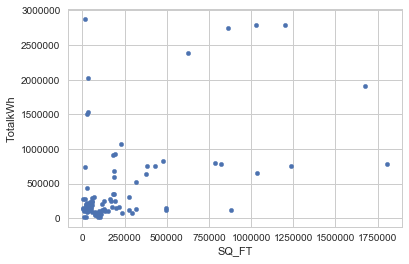

In [244]:
meta_annualdata.plot.scatter(x='SQ_FT', y='TotalkWh')

In [192]:
meta_annualdata.plot.bar(x='TotalkWh', y = 'SITE_ID')

TypeError: Empty 'DataFrame': no numeric data to plot

KeyError: 'SITE_ID'

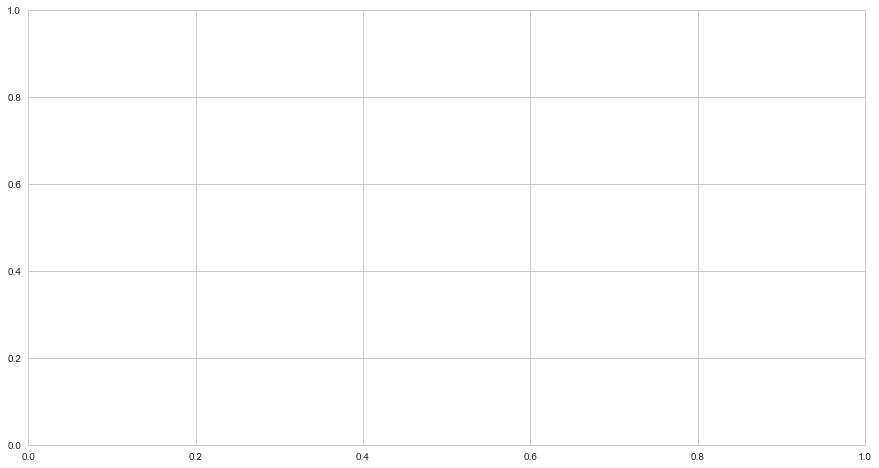

In [198]:
meta_annualdata.plot(kind='scatter', y="SITE_ID", x="TotalkWh", s=40, marker='*',color= 'b',figsize=(15,8))

In [237]:
m = meta_annualdata.drop(['SQ_FT','LAT','LNG','TIME_ZONE','TZ_OFFSET','INDUSTRY','SUB_INDUSTRY'],axis=1)

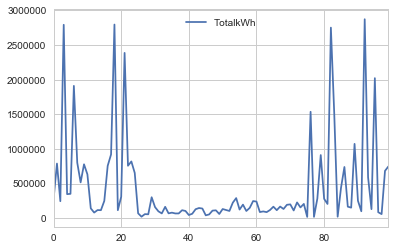

In [203]:
m.plot()

In [240]:
m.sample()

SITE_ID index      TotalkWh
35     137   137  79467.104029

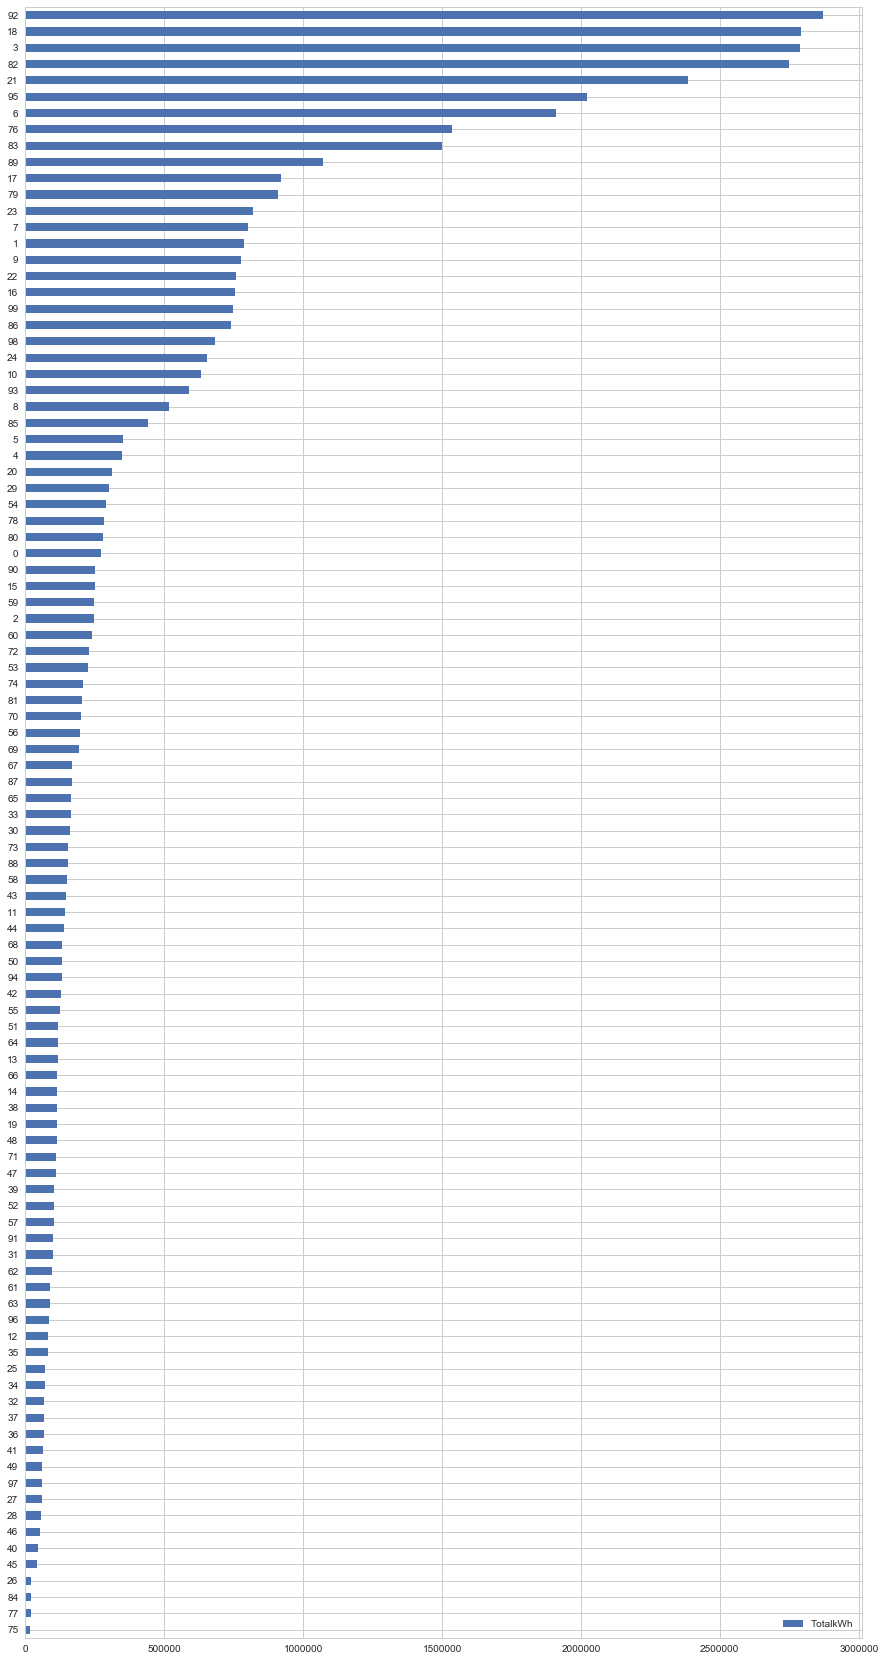

In [233]:
m.sort_values(by='TotalkWh' ,axis=0,ascending=True ).plot(kind='barh', figsize=(15,30))

In [245]:
# df['three'] = df.one.eq(pd.to_numeric(df.two, errors='coerce'))

df['three'] = meta_annualdata.SITE_ID.eq(meta_annualdata(meta_annualdata.index, errors='coerce'))

TypeError: 'DataFrame' object is not callable